03:52:40 - cmdstanpy - INFO - Chain [1] start processing
03:52:40 - cmdstanpy - INFO - Chain [1] done processing


MAE: 178.7484546411998
RMSE: 223.15070646945364


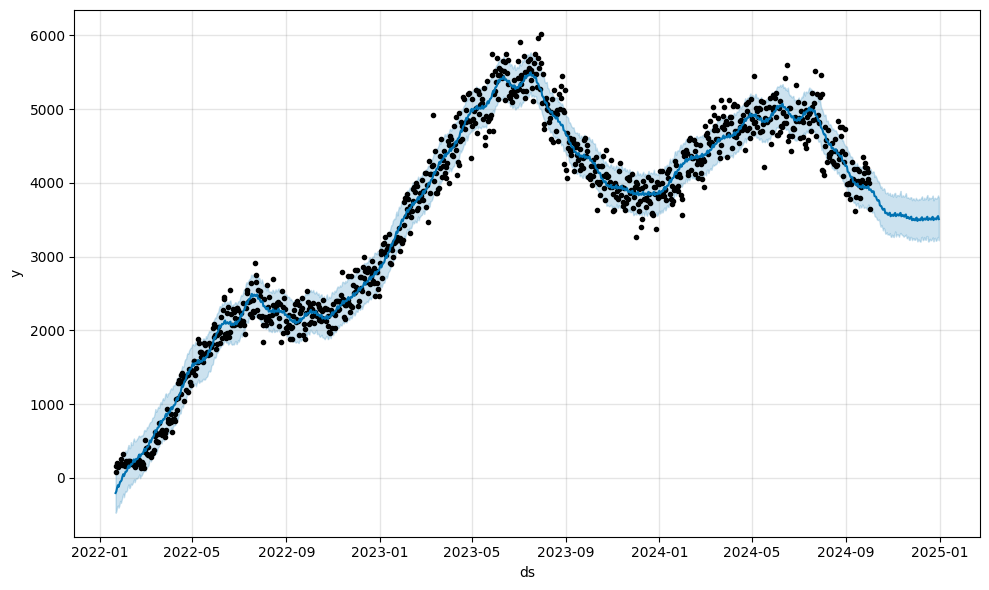

In [1]:
# ============================================
# 03 — BASELINE MODEL (PROPHET)
# ============================================

import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

df = pd.read_csv("../data/raw/FMCG_2022_2024.csv")
df['date'] = pd.to_datetime(df['date'])

# Aggregate total sales
daily = df.groupby('date')['units_sold'].sum().reset_index()
daily.columns = ['ds', 'y']

# Train/Test split (last 90 days as test)
split_date = daily['ds'].max() - pd.Timedelta(days=90)

train = daily[daily['ds'] <= split_date]
test = daily[daily['ds'] > split_date]

# --------------------------------------------
# Prophet Model
# --------------------------------------------

model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False
)

model.fit(train)

future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

# --------------------------------------------
# Evaluation
# --------------------------------------------

pred = forecast[['ds','yhat']]
merged = test.merge(pred, on='ds')

mae = mean_absolute_error(merged['y'], merged['yhat'])
rmse = np.sqrt(mean_squared_error(merged['y'], merged['yhat']))

print("MAE:", mae)
print("RMSE:", rmse)

model.plot(forecast)
plt.show()